In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA


In [2]:
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

In [3]:

print(df.head())

print(df.shape)


Premières lignes des données :
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Taille des données :
(200, 5)


In [4]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
kmeans_random = KMeans(n_clusters=5, init='random', random_state=0)
kmeans_random.fit(X_scaled)
centroids_random = kmeans_random.cluster_centers_

In [7]:
kmeans_data = KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans_data.fit(X_scaled)
centroids_data = kmeans_data.cluster_centers_

In [8]:
silhouette_random = silhouette_score(X_scaled, kmeans_random.labels_)
silhouette_data = silhouette_score(X_scaled, kmeans_data.labels_)
print(f"Score de silhouette (initialisation aléatoire): {silhouette_random}")
print(f"Score de silhouette (initialisation à partir des données): {silhouette_data}")

Score de silhouette (initialisation aléatoire): 0.41664341513732767
Score de silhouette (initialisation à partir des données): 0.41664341513732767


In [9]:
calinski_random = calinski_harabasz_score(X_scaled, kmeans_random.labels_)
calinski_data = calinski_harabasz_score(X_scaled, kmeans_data.labels_)
print(f"Indice de Calinski-Harabasz (initialisation aléatoire): {calinski_random}")
print(f"Indice de Calinski-Harabasz (initialisation à partir des données): {calinski_data}")

Indice de Calinski-Harabasz (initialisation aléatoire): 125.10094020060956
Indice de Calinski-Harabasz (initialisation à partir des données): 125.10094020060956


In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Nouvelle matrice des observations après PCA :")
print(X_pca[:5])

Nouvelle matrice des observations après PCA :
[[-0.61572002 -1.76348088]
 [-1.66579271 -1.82074695]
 [ 0.33786191 -1.67479894]
 [-1.45657325 -1.77242992]
 [-0.03846521 -1.66274012]]


In [21]:
centroids_pca = pca.transform(centroids_data)

print("Valeurs propres des axes principaux :")
print(pca.explained_variance_)


print("Vecteurs propres (composantes principales) :")
print(pca.components_)

Valeurs propres des axes principaux :
[1.33465831 1.00427272]
Vecteurs propres (composantes principales) :
[[ 0.70638235 -0.04802398 -0.70619946]
 [ 0.03014116  0.9988316  -0.03777499]]


In [22]:
print("Inertie de chaque axe :")
print(pca.explained_variance_ratio_)

Inertie de chaque axe :
[0.44266167 0.33308378]


In [24]:
print("Somme des inerties des axes :")
print(np.sum(pca.explained_variance_ratio_))

Somme des inerties des axes :
0.7757454566976747


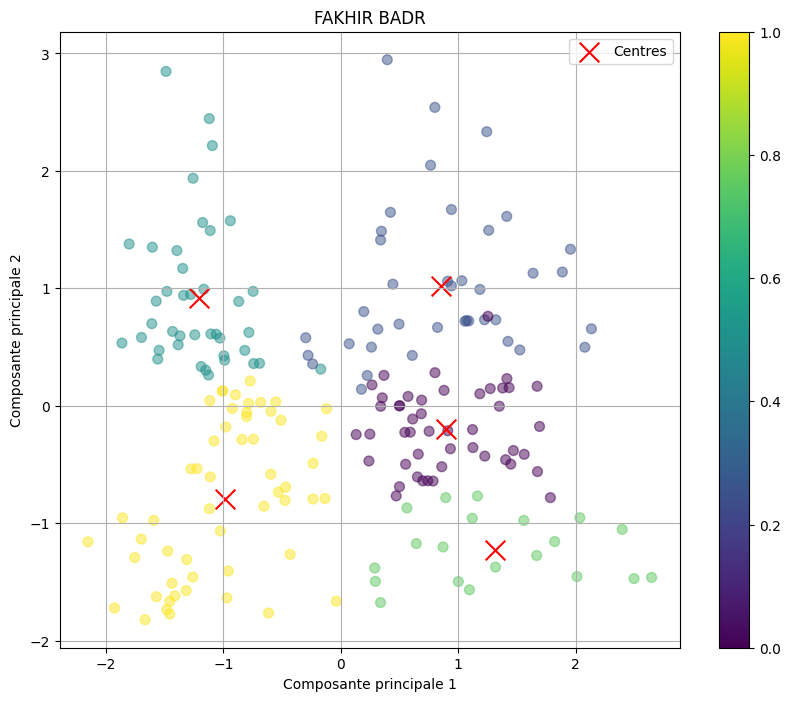

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_data.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, c='red', label='Centres')
plt.title('FAKHIR BADR')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar()
plt.legend()
plt.grid(True)
plt.show()


In [14]:
X_pca_transformed = pca.components_

In [15]:
print(f"Valeurs propres des axes principaux : {pca.explained_variance_}")
print(f"Vecteurs propres associés aux axes principaux :\n{X_pca_transformed}")

Valeurs propres des axes principaux : [1.33465831 1.00427272]
Vecteurs propres associés aux axes principaux :
[[ 0.70638235 -0.04802398 -0.70619946]
 [ 0.03014116  0.9988316  -0.03777499]]


In [16]:
print(f"Inertie de chaque axe : {pca.explained_variance_ratio_}")
print(f"Somme des inertie de chaque axe : {np.sum(pca.explained_variance_ratio_)}")

Inertie de chaque axe : [0.44266167 0.33308378]
Somme des inertie de chaque axe : 0.7757454566976747
